In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import leastsq

## Least Square Method

Objective function: 
$$
y = sin(2\pi x)
$$

In [2]:
def obj_func(x: np.ndarray) -> np.ndarray:
    return np.sin(2 * np.pi * x)

def fit_poly_func(p: np.ndarray, x: np.ndarray) -> np.ndarray:
    f = np.poly1d(p)
    return f(x)

def residuals_func(p: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return fit_poly_func(p, x) - y

In [3]:
x_train = np.linspace(0, 1, 10)
y_train = obj_func(x_train) + np.random.normal(0, 0.1, x_train.shape)  # Add noise
x_points = np.linspace(0, 1, 1000)

In [4]:
def fitting(M: int):
    """
    M: int
        Degree of polynomial to fit
    """
    p_init = np.random.rand(M + 1)  # Initial guess for polynomial coefficients
    p_lsq = leastsq(residuals_func, p_init, args=(x_train, y_train))
    print("Fitting Parameters:", p_lsq[0])

    plt.plot(x_points, obj_func(x_points), 'g', label='True Function')
    plt.plot(x_points, fit_poly_func(p_lsq[0], x_points), 'b', label='Fitted Polynomial')
    plt.scatter(x_train, y_train, c='r', label='Training Data')
    plt.title(f'Polynomial Degree {M}')
    plt.legend()

    return p_lsq

Fitting Parameters: [-0.00474908]


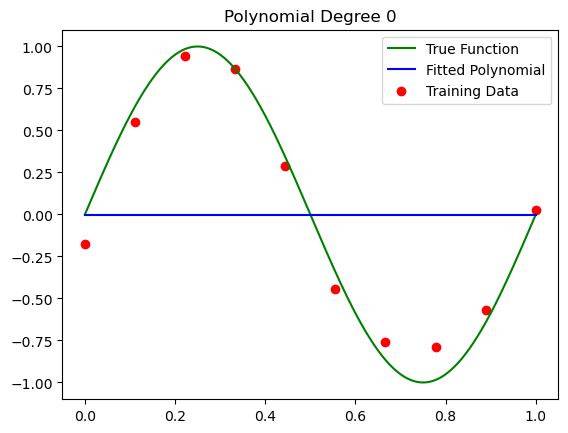

In [5]:
p_lsq0 = fitting(0)

Fitting Parameters: [-1.10530853  0.54790519]


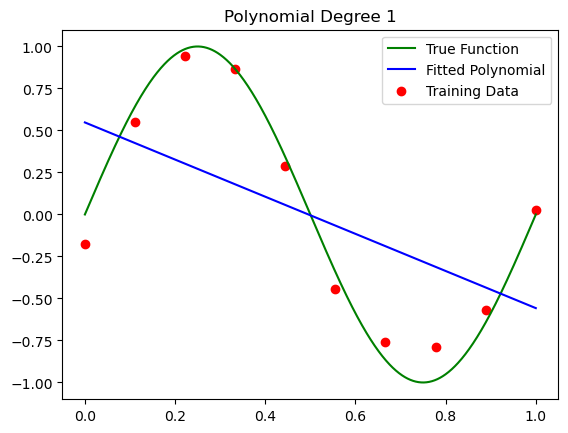

In [6]:
p_lsq1 = fitting(1)

Fitting Parameters: [-0.2362094  -0.86909912  0.5129112 ]


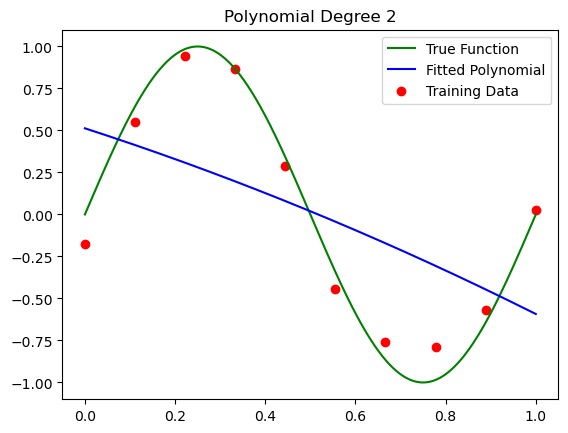

In [7]:
p_lsq2 = fitting(2)

Fitting Parameters: [ 20.39493038 -30.82860503  10.73838599  -0.19209875]


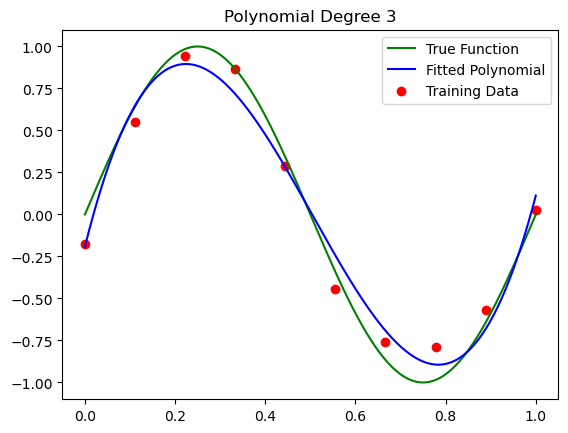

In [8]:
p_lsq3 = fitting(3)

Fitting Parameters: [ -7.03961693  34.474164   -39.60639859  12.47656285  -0.23845012]


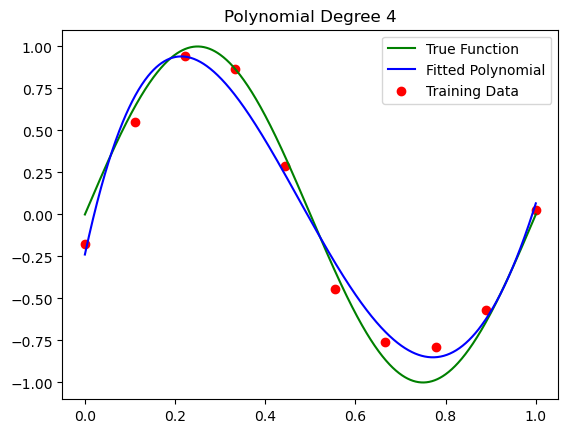

In [9]:
p_lsq4 = fitting(4)

Fitting Parameters: [-53.89461019 127.69691261 -83.07375992   1.97895472   7.48768888
  -0.18368747]


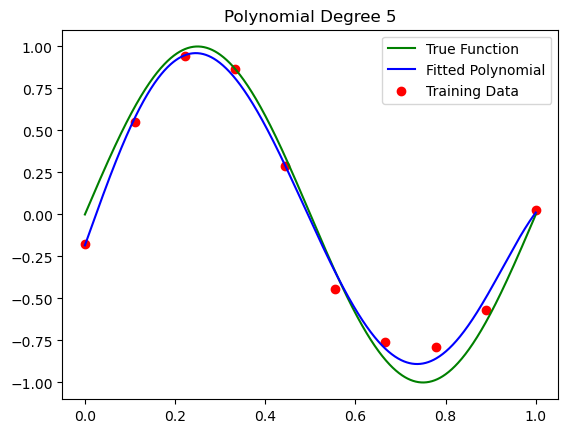

In [10]:
p_lsq5 = fitting(5)

Fitting Parameters: [ 1.16138359e+02 -4.02309609e+02  5.19386686e+02 -2.85761731e+02
  4.90708315e+01  3.67065011e+00 -1.69383531e-01]


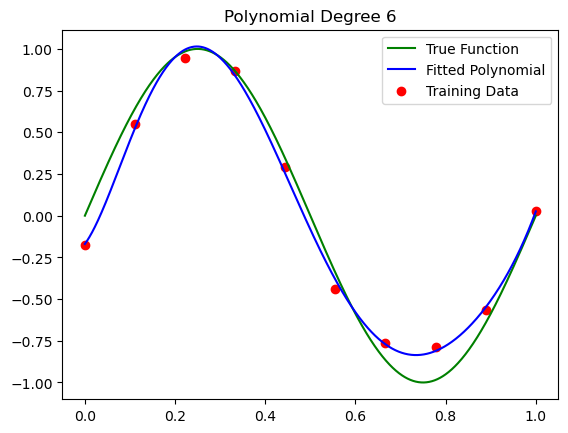

In [11]:
p_lsq6 = fitting(6)

Fitting Parameters: [ 4.10730921e+02 -1.32141990e+03  1.57859932e+03 -8.38989897e+02
  1.94644026e+02 -3.19403816e+01  8.58018731e+00 -1.73923409e-01]


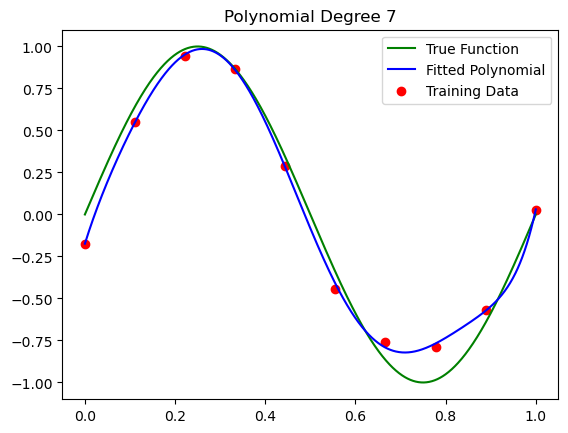

In [12]:
p_lsq7 = fitting(7)

Fitting Parameters: [-1.02561946e+03  4.51320982e+03 -8.02213752e+03  7.32207367e+03
 -3.59775169e+03  9.25937243e+02 -1.28895763e+02  1.33879516e+01
 -1.74595222e-01]


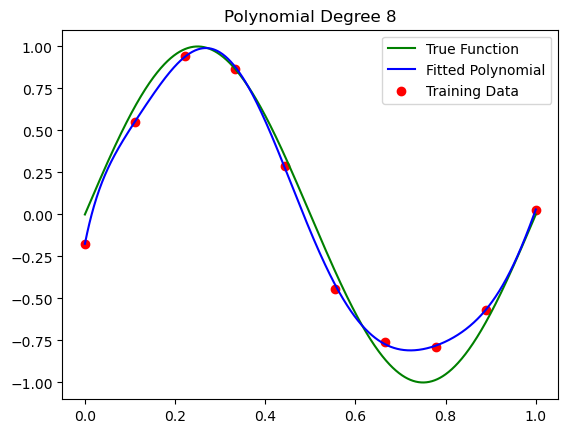

In [13]:
p_lsq8 = fitting(8)

Fitting Parameters: [-8.25874470e+03  3.61387134e+04 -6.57310285e+04  6.43991947e+04
 -3.69062985e+04  1.26365756e+04 -2.52974059e+03  2.54754042e+02
 -3.22150435e+00 -1.74436140e-01]


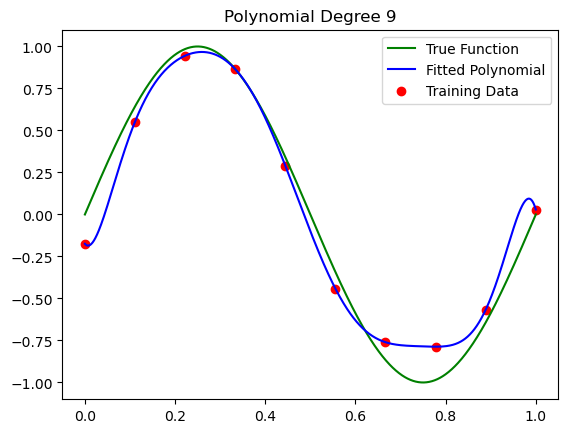

In [14]:
p_lsq9 = fitting(9)

---

## Regularization

In [15]:
def residuals_func_regularized(p: np.ndarray, x: np.ndarray, y: np.ndarray, lam: float) -> np.ndarray:
    ret = fit_poly_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * lam * np.square(p)))

    return ret

Fitting Parameters without Regularization:
 [-8.25874470e+03  3.61387134e+04 -6.57310285e+04  6.43991947e+04
 -3.69062985e+04  1.26365756e+04 -2.52974059e+03  2.54754042e+02
 -3.22150435e+00 -1.74436140e-01]
Fitting Parameters with Regularization:
 [ -1.67914117  -3.84455989  -1.77172163   3.5698587    9.02829024
   8.66073179  -3.58683139 -19.47471852   9.2944041   -0.17882839]


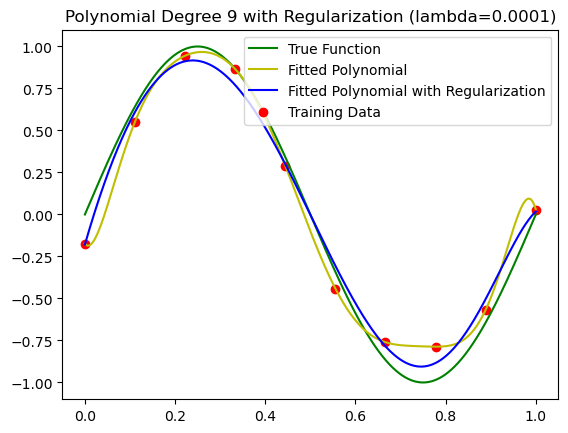

In [16]:
M = 9
lam = 0.0001
p_init = np.random.rand(M + 1)  # Initial guess for polynomial coefficients
p_lsq9 = leastsq(residuals_func, p_init, args=(x_train, y_train))
print("Fitting Parameters without Regularization:\n", p_lsq9[0])
p_lsq_reg = leastsq(residuals_func_regularized, p_init, args=(x_train, y_train, lam))
print("Fitting Parameters with Regularization:\n", p_lsq_reg[0])
plt.plot(x_points, obj_func(x_points), 'g', label='True Function')
plt.plot(x_points, fit_poly_func(p_lsq9[0], x_points), 'y', label='Fitted Polynomial')
plt.plot(x_points, fit_poly_func(p_lsq_reg[0], x_points), 'b', label='Fitted Polynomial with Regularization')
plt.scatter(x_train, y_train, c='r', label='Training Data')
plt.title(f'Polynomial Degree {M} with Regularization (lambda={lam})')
plt.legend()